In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
Base.classes.keys()

['measurement', 'station']

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [33]:
data=session.query(extract('year',Measurement.date)).all()


In [38]:
data_df=pd.DataFrame(data, columns=['year'])

year_df=data_df.drop_duplicates()
year_df

,year
0,2010
330,2011
674,2012
1036,2013
1401,2014
1764,2015
2128,2016
2494,2017


## D1: Determine the Summary Statistics for June

In [5]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()


[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [6]:
# 2. Convert the June temperatures to a list.
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()


In [7]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns = ['date', 'temperature'])
june_temps_df


,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [8]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()



,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


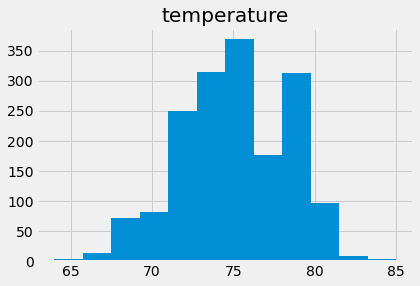

In [9]:
#June histogram
june_temps_df.hist(bins=12)
plt.savefig("Resources/June_histogram.png")

In [10]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [11]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()


[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [12]:
# 7. Convert the December temperatures to a list.
dec_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()



In [13]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns=['date', 'temperature'])
dec_temps_df

,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [14]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()


,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


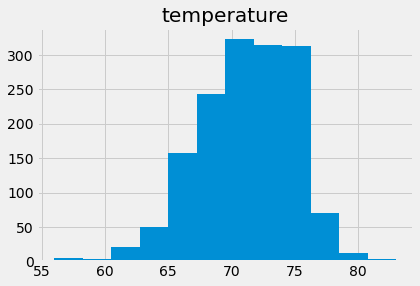

In [15]:
# December histogram
dec_temps_df.hist(bins=12)
plt.savefig("Resources/Dec_histogram.png")


In [16]:
# 10. Return to your challenge instructions to compare your summary statistics


In [21]:
# Additional queries
# Low tempertures in December by day and year
dec_low_temps=session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12, (Measurement.tobs < 65.0)).order_by('date').all()
dec_low_temps


[('2010-12-06', 64.0),
 ('2010-12-06', 64.0),
 ('2010-12-06', 61.0),
 ('2010-12-06', 61.0),
 ('2010-12-06', 61.0),
 ('2010-12-07', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-07', 58.0),
 ('2010-12-07', 62.0),
 ('2010-12-08', 62.0),
 ('2010-12-08', 60.0),
 ('2010-12-08', 63.0),
 ('2010-12-10', 64.0),
 ('2010-12-10', 63.0),
 ('2010-12-10', 64.0),
 ('2010-12-11', 64.0),
 ('2010-12-16', 63.0),
 ('2010-12-17', 64.0),
 ('2010-12-17', 63.0),
 ('2011-12-31', 63.0),
 ('2012-12-06', 64.0),
 ('2012-12-23', 64.0),
 ('2012-12-23', 61.0),
 ('2012-12-24', 62.0),
 ('2012-12-27', 63.0),
 ('2012-12-28', 62.0),
 ('2012-12-28', 64.0),
 ('2012-12-28', 62.0),
 ('2012-12-29', 64.0),
 ('2012-12-29', 62.0),
 ('2013-12-05', 64.0),
 ('2013-12-05', 64.0),
 ('2013-12-16', 63.0),
 ('2013-12-16', 64.0),
 ('2013-12-17', 64.0),
 ('2013-12-17', 63.0),
 ('2013-12-18', 63.0),
 ('2013-12-23', 64.0),
 ('2013-12-24', 63.0),
 ('2013-12-30', 64.0),
 ('2014-12-02', 62.0),
 ('2014-12-07', 62.0),
 ('2014-12-07', 64.0),
 ('2014-12-

In [22]:
len(dec_low_temps)

80

In [18]:
dec_low_temps_df= pd.DataFrame(dec_low_temps, columns =['date','temperature'])
dec_low_temps_df

,date,temperature
0,2010-12-06,64.0
1,2010-12-06,64.0
2,2010-12-06,61.0
3,2010-12-06,61.0
4,2010-12-06,61.0
...,...,...
75,2016-12-15,64.0
76,2016-12-16,62.0
77,2016-12-16,63.0
78,2016-12-16,63.0


In [19]:
#Additional query March
march_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 3).all()


In [20]:
march_temps_df= pd.DataFrame(march_temps, columns=['date', 'temperature'])
march_temps_df

,date,temperature
0,2010-03-01,70.0
1,2010-03-02,72.0
2,2010-03-03,73.0
3,2010-03-04,70.0
4,2010-03-05,71.0
...,...,...
1688,2017-03-26,72.0
1689,2017-03-27,74.0
1690,2017-03-28,69.0
1691,2017-03-29,69.0


In [21]:
#March summary statistics
march_temps_df.describe()

,temperature
count,1693.000000
mean,70.059067
std,3.845271
min,56.000000
25%,68.000000
50%,70.000000
75%,73.000000
max,82.000000


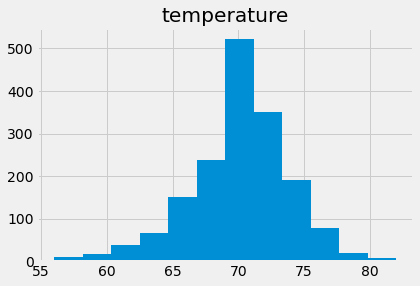

In [22]:
# March histogram
march_temps_df.hist(bins=12)
plt.savefig("Resources/March_histogram.png")

In [23]:
#Additional query September
sep_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 9).all()


In [24]:
sep_temps_df= pd.DataFrame(sep_temps, columns=['date', 'temperature'])
sep_temps_df

,date,temperature
0,2010-09-01,77.0
1,2010-09-02,76.0
2,2010-09-03,78.0
3,2010-09-04,77.0
4,2010-09-05,77.0
...,...,...
1475,2016-09-26,74.0
1476,2016-09-27,74.0
1477,2016-09-28,77.0
1478,2016-09-29,77.0


In [25]:
#September summary statistics
sep_temps_df.describe()

,temperature
count,1480.000000
mean,76.164865
std,3.535178
min,64.000000
25%,74.000000
50%,76.000000
75%,79.000000
max,87.000000


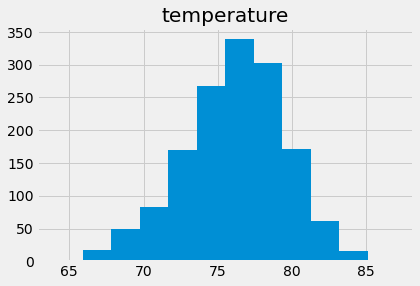

In [26]:
#September histogram
sep_temps_df.hist(bins=12)
plt.savefig("Resources/Sep_histogram.png")
